# Entregable 1
## Inteligencia Artificial

En este entregable se realizará la aplicación de Análisis Exploratorio de Datos (EDA), y los clasificadores K vecinos más cercanos (k-NN) y árboles de decisión.

Para la solución deben escoger algún conjunto de datos para **clasificación** de kaggle (https://www.kaggle.com/datasets) o UCI (https://archive.ics.uci.edu/). 

Con los datos seleccionados hacer lo siguiente:

1. Realizar un Análisis Exploratorio de Datos del conjunto de datos seleccionado. En este paso indicar qué se hace y para qué, es decir, realizar un análisis consciente de lo que se está realizando y con qué fin.

2. Realizar una división del conjunto de datos en entrenamiento (train) y prueba (test), la proporción de división es libre.

3. Con el conjunto de datos depurado realizar el entrenamiento de un modelo de k-NN. Encontrar el valor de k óptimo para la solución del problema con el conjunto de prueba.

4. Finalmente, realizar el entrenamiento de un clasificador de árbol de decisión. Realizar la evaluación de este clasificador para diferentes hiperparámetros, buscando encontrar los mejores para el conjunto de prueba.

In [1]:
#celda para importar, pueden agregar las que requieran

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Solución a punto 1.

In [2]:
df = pd.read_csv('train.csv')
print(df.shape)
df

(100000, 28)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [3]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [5]:
df.columns = df.columns.str.lower()
df = df.drop(['id', 'customer_id', 'month', 'name', 'ssn'], axis=1)
df.head(2)

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,type_of_loan,delay_from_due_date,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,...,Good,809.98,26.82262,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",3.0,...,Good,809.98,31.94496,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good


In [6]:
numerical_features_all = df.select_dtypes(include=np.number).columns
print('Columnas numéricas:',numerical_features_all)
df_num = df[numerical_features_all]

categorical_features_all = df.select_dtypes(include='object').columns
print('\nColumnas categóricas:',categorical_features_all)
df_str = df[categorical_features_all]

Columnas numéricas: Index(['age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'credit_history_age', 'total_emi_per_month', 'amount_invested_monthly',
       'monthly_balance'],
      dtype='object')

Columnas categóricas: Index(['occupation', 'type_of_loan', 'credit_mix', 'payment_of_min_amount',
       'payment_behaviour', 'credit_score'],
      dtype='object')


In [7]:
for c in numerical_features_all:
    print(f'{c}: \t min:', df[c].min(), '\tmax:', df[c].max())

age: 	 min: 14.0 	max: 56.0
annual_income: 	 min: 7005.93 	max: 179987.28
monthly_inhand_salary: 	 min: 303.6454166666666 	max: 15204.633333333331
num_bank_accounts: 	 min: 0.0 	max: 11.0
num_credit_card: 	 min: 0.0 	max: 11.0
interest_rate: 	 min: 1.0 	max: 34.0
num_of_loan: 	 min: 0.0 	max: 9.0
delay_from_due_date: 	 min: 0.0 	max: 62.0
num_of_delayed_payment: 	 min: 0.0 	max: 25.0
changed_credit_limit: 	 min: 0.5 	max: 29.98
num_credit_inquiries: 	 min: 0.0 	max: 17.0
outstanding_debt: 	 min: 0.23 	max: 4998.07
credit_utilization_ratio: 	 min: 20.0 	max: 50.00000000000001
credit_history_age: 	 min: 1.0 	max: 404.0
total_emi_per_month: 	 min: 0.0 	max: 1779.1032538262775
amount_invested_monthly: 	 min: 0.0 	max: 434.1910893520318
monthly_balance: 	 min: 0.0077596647753352 	max: 1183.9306960885192


In [8]:
df_num.head()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.46538,312.494089
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.46538,284.629162
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.46538,331.209863
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.46538,223.451310
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.46538,341.489231


In [9]:
df_num.describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.316340,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,10.764812,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,24.000000,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,33.000000,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,42.000000,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


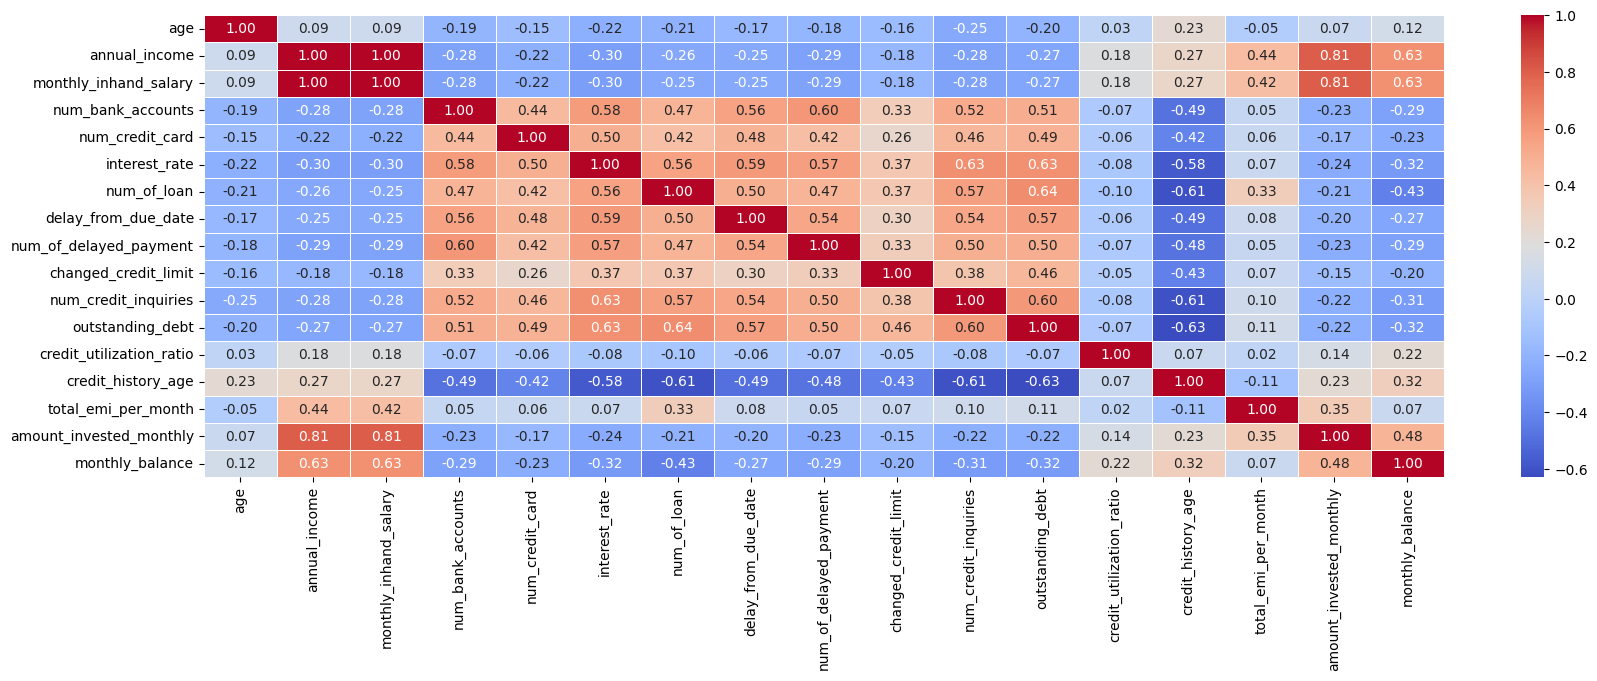

In [10]:
plt.figure(figsize=(20, 6))
heatmap = sns.heatmap(df_num.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

In [11]:
df_num = df_num.drop('annual_income', axis=1)

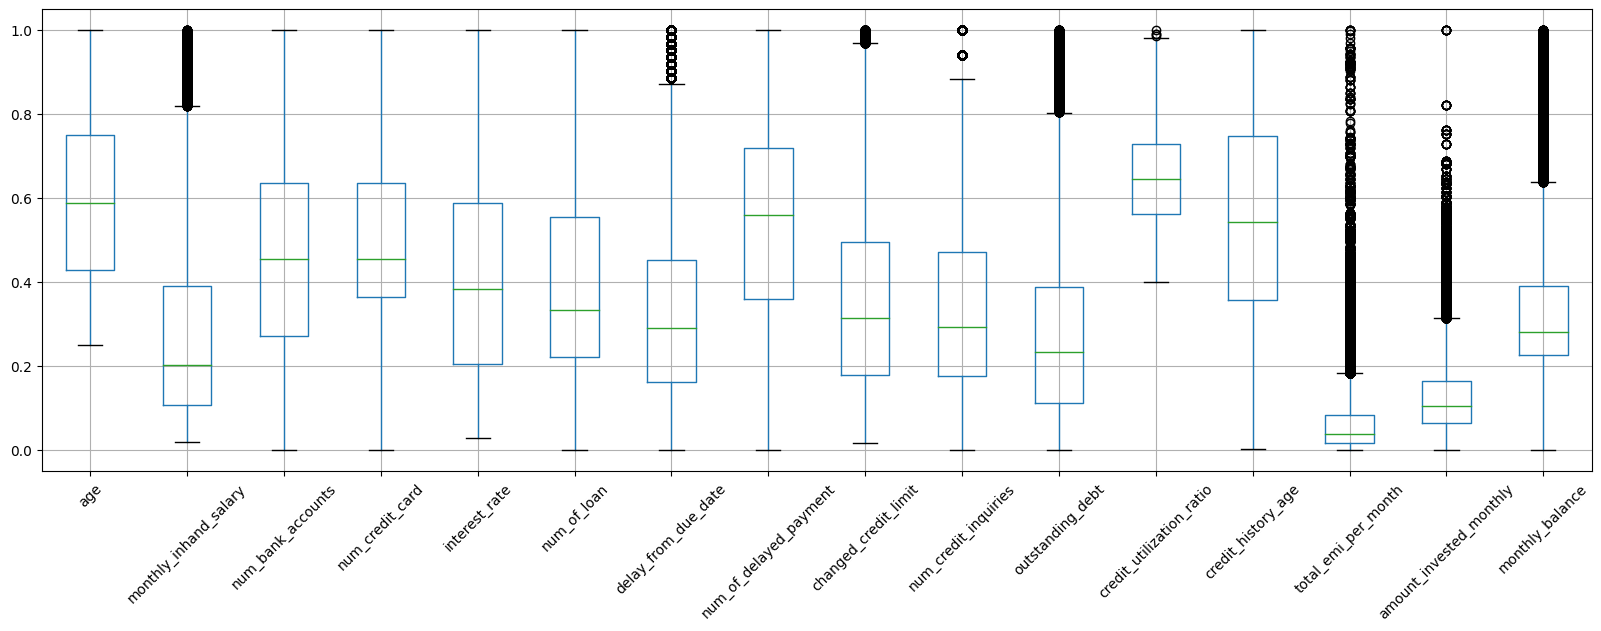

In [12]:
plt.figure(figsize=(20, 6))
ax = (df_num/df_num.max()).boxplot()
plt.xticks(rotation=45)
plt.show()

## calculate the average of each column for each label in the target variable

In [13]:
grouped = df.groupby('credit_score').mean(numeric_only=True)
grouped

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance
credit_score,,,,,,,,,,,,,,,,,
Good,36.402625,65203.672105,5399.919696,3.440263,4.143258,7.662329,2.202154,10.958997,8.564842,7.249857,3.298631,801.256324,32.686107,284.765650,121.691019,67.417611,456.691556
Poor,31.194565,40584.515325,3380.560657,6.526726,6.625147,20.187116,4.755742,29.728809,15.809883,11.116281,8.179599,2081.473157,31.986146,170.061797,111.198326,47.033019,339.212601
Standard,33.438673,50987.164840,4239.436890,5.383966,5.404427,13.751420,3.312164,19.759431,13.543518,11.197803,5.337665,1278.419552,32.313820,227.814195,101.099865,55.371927,400.409496


## process the `type_of_loan` column to expand it and create a column for each unique value in it


In [14]:
def process_type_of_loan(df):
    
    # Split the strings and create a set of unique items
    unique_items = set()
    
    for item_list in df['type_of_loan']:
        items = item_list.split(',')
        unique_items.update(items)

    # Create a dictionary to hold binary indicators for each item
    indicators = {}
    for item in unique_items:
        indicators[item] = df['type_of_loan'].apply(lambda x: item in x).astype(int)

    # Create a new DataFrame with binary indicators
    result_df = pd.DataFrame(indicators)
    
    return result_df

In [15]:
df_str = pd.concat([df_str, process_type_of_loan(df)], axis=1).drop('type_of_loan', axis=1)
df_str.head()

,occupation,credit_mix,payment_of_min_amount,payment_behaviour,credit_score,debt consolidation loan,payday loan,credit-builder loan,auto loan,home equity loan,not specified,No Data,mortgage loan,student loan,personal loan
0,Scientist,Good,No,High_spent_Small_value_payments,Good,0,0,1,1,1,0,0,0,0,1
1,Scientist,Good,No,Low_spent_Large_value_payments,Good,0,0,1,1,1,0,0,0,0,1
2,Scientist,Good,No,Low_spent_Medium_value_payments,Good,0,0,1,1,1,0,0,0,0,1
3,Scientist,Good,No,Low_spent_Small_value_payments,Good,0,0,1,1,1,0,0,0,0,1
4,Scientist,Good,No,High_spent_Medium_value_payments,Good,0,0,1,1,1,0,0,0,0,1


In [16]:
df_str.nunique()

occupation                 15
credit_mix                  3
payment_of_min_amount       3
payment_behaviour           6
credit_score                3
debt consolidation loan     2
payday loan                 2
credit-builder loan         2
auto loan                   2
home equity loan            2
not specified               2
No Data                     2
mortgage loan               2
student loan                2
personal loan               2
dtype: int64

## create One-Hot_Encoded features from categorical features with `pd.get_dummies`

In [17]:
df_str = df_str.drop('occupation', axis=1)
df_str = pd.get_dummies(df_str, drop_first=False)
df_str.head()

,debt consolidation loan,payday loan,credit-builder loan,auto loan,home equity loan,not specified,No Data,mortgage loan,student loan,personal loan,...,payment_of_min_amount_Yes,payment_behaviour_High_spent_Large_value_payments,payment_behaviour_High_spent_Medium_value_payments,payment_behaviour_High_spent_Small_value_payments,payment_behaviour_Low_spent_Large_value_payments,payment_behaviour_Low_spent_Medium_value_payments,payment_behaviour_Low_spent_Small_value_payments,credit_score_Good,credit_score_Poor,credit_score_Standard
0,0,0,1,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,0,0,1,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
2,0,0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
3,0,0,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
4,0,0,1,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


# Solución a punto 2.

Realizar una división del conjunto de datos en entrenamiento (train) y prueba (test), la proporción de división es libre.

In [18]:
X = pd.concat([df_str, df_num], axis=1)
y = df['credit_score']

Separando entre datos de entrenamiento y test

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Solución a punto 3.

3. Con el conjunto de datos depurado realizar el entrenamiento de un modelo de k-NN. Encontrar el valor de k óptimo para la solución del problema con el conjunto de prueba.

In [31]:
np.random.seed(123)

%matplotlib inline

In [22]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (80000, 41)
y_train shape: (80000,)
X_test shape: (20000, 41)
y_test shape: (20000,)


In [23]:
class kNN():
    def __init__(self):
        pass

    def fit(self, X, y):
        self.data = X
        self.targets = y

    def euclidean_distance(self, X):
        """
        Computes the euclidean distance between the training data and
        a new input example or matrix of input examples X
        """
        # input: single data point
        if X.ndim == 1:
            l2 = np.sqrt(np.sum((self.data - X)**2, axis=1))

        # input: matrix of data points
        if X.ndim == 2:
            n_samples, _ = X.shape
            l2 = [np.sqrt(np.sum((self.data - X[i])**2, axis=1)) for i in range(n_samples)]

        return np.array(l2)

    def predict(self, X, k=1):
        """
        Predicts the classification for an input example or matrix of input examples X
        """
        # step 1: compute distance between input and training data
        dists = self.euclidean_distance(X)

        # step 2: find the k nearest neighbors and their classifications
        if X.ndim == 1:
            if k == 1:
                nn = np.argmin(dists)
                return self.targets[nn]
            else:
                knn = np.argsort(dists)[:k]
                y_knn = self.targets[knn]
                max_vote = max(y_knn, key=list(y_knn).count)
                return max_vote

        if X.ndim == 2:
            knn = np.argsort(dists)[:, :k]
            y_knn = self.targets[knn]
            if k == 1:
                return y_knn.T
            else:
                n_samples, _ = X.shape
                max_votes = [max(y_knn[i], key=list(y_knn[i]).count) for i in range(n_samples)]
                return max_votes

In [24]:
knn = kNN()
knn.fit(X_train, y_train)

In [28]:
print("Testing one datapoint, k=1")
print(f"Predicted label: {knn.predict(X_test.iloc[0], k=1)}")
print(f"True label: {y_test.iloc[0]}")

Testing one datapoint, k=1
Predicted label: Standard
True label: Poor


In [30]:
print("Testing one datapoint, k=10")
print(f"Predicted label: {knn.predict(X_test.iloc[20], k=10)}")
print(f"True label: {y_test.iloc[20]}")
print()

Testing one datapoint, k=10


TypeError: KNeighborsClassifier.predict() got an unexpected keyword argument 'k'

In [ ]:
print("Testing one datapoint, k=4")
print(f"Predicted label: {knn.predict(X_test.iloc[32], k=4)}")
print(f"True label: {y_test.iloc[32]}")
print()

Testing one datapoint, k=4
Predicted label: Standard
True label: Standard



In [ ]:
print("Testing one datapoint, k=3")
print(f"Predicted label: {knn.predict(X_test.iloc[41], k=3)}")
print(f"True label: {y_test.iloc[41]}")
print()

Testing one datapoint, k=3
Predicted label: Standard
True label: Poor



# OTRO MÉTODO DE KNN CON SKLEARN

In [32]:
%%time
from sklearn.neighbors import KNeighborsClassifier as KNN

knn = KNN()
knn.fit(X_train, y_train)

CPU times: user 54.8 ms, sys: 9.11 ms, total: 63.9 ms
Wall time: 63.7 ms


KNeighborsClassifier()

In [35]:
%%time
knn.score(X_train, y_train)

CPU times: user 28.9 s, sys: 817 ms, total: 29.7 s
Wall time: 5.16 s


0.8225

In [36]:
y_pred = knn.predict(X_test)

In [37]:
from sklearn.metrics import *

In [38]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.72255
Precision: 0.6957090137605028
Recall: 0.6997159352053693


## Solución a punto 4.

Finalmente, realizar el entrenamiento de un clasificador de árbol de decisión. Realizar la evaluación de este clasificador para diferentes hiperparámetros, buscando encontrar los mejores para el conjunto de prueba.

In [39]:
# Importamos las librerias para la creacion del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir el clasificador y los valores de los hiperparámetros a probar
clf = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=4)

param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}
#clf.fit(X_train, y_train)

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train, y_train)  # Ajustar el modelo con los datos de entrenamiento

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)


Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 2}
Mejor puntuación de validación cruzada:
1.0


In [40]:
best_clf = grid_search.best_estimator_

In [41]:
print(best_clf)

DecisionTreeClassifier(max_depth=2, random_state=42)


In [42]:
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
print('El accuracy en train es:',accuracy_score(y_train,y_train_pred))
print('El accuracy en test es:', accuracy_score(y_test,y_test_pred))

El accuracy en train es: 1.0
El accuracy en test es: 1.0


In [44]:
best_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.36717518, 0.63282482,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

<BarContainer object of 41 artists>

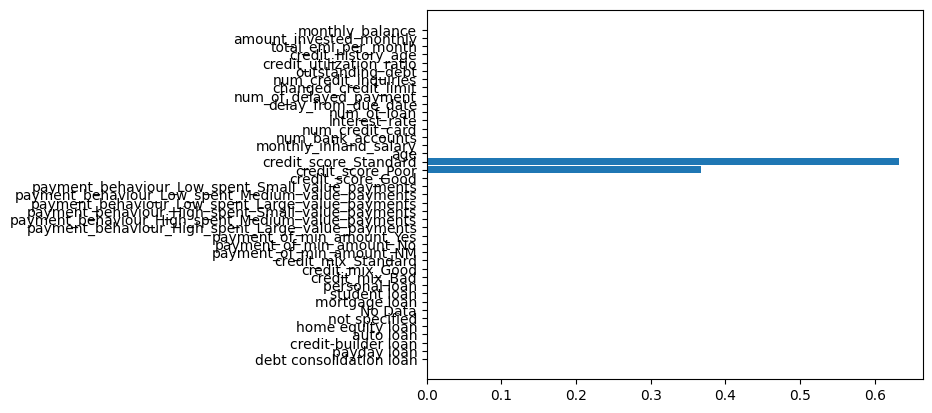

In [45]:
plt.barh(X_train.columns,best_clf.feature_importances_, )

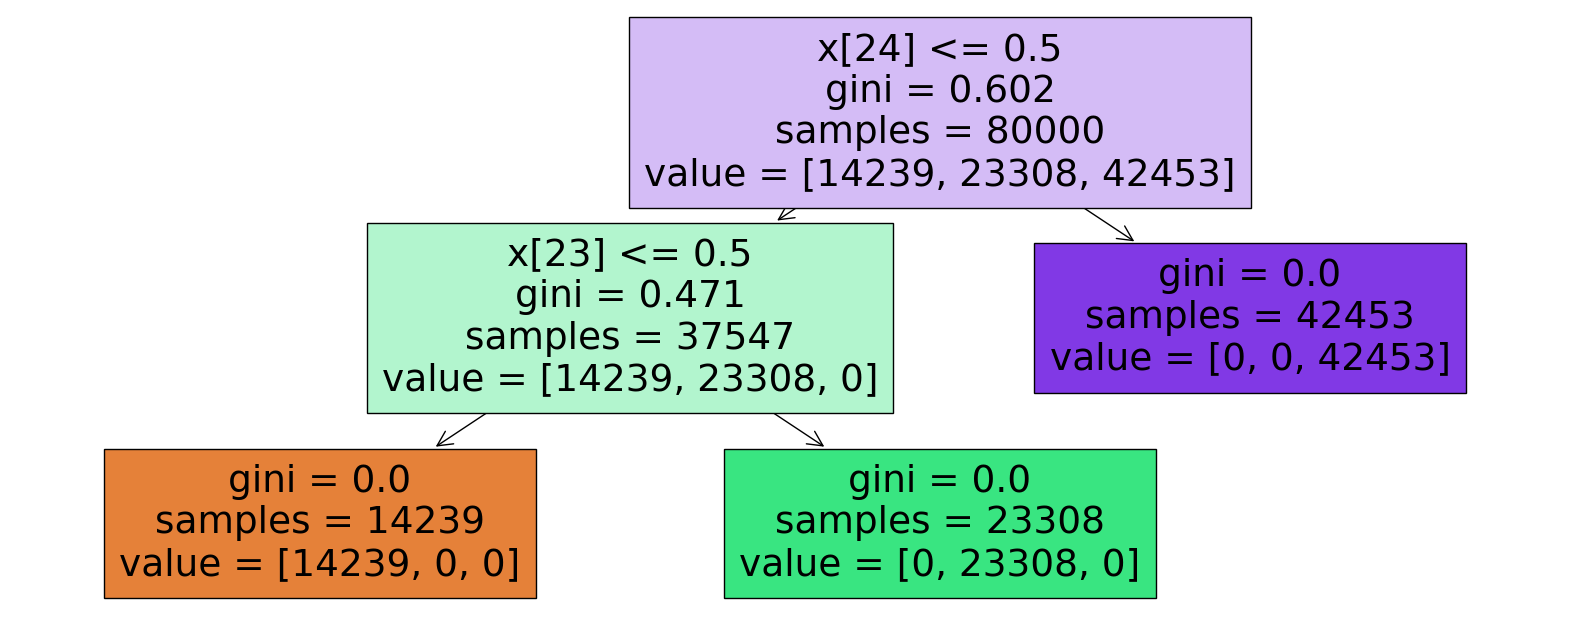

In [46]:
plt.figure(figsize = (20,8))
from sklearn import tree

tree.plot_tree(best_clf,filled=True)
plt.savefig('Resultados.pdf', transparent=True, dpi=300)

En vista de que el DT es escaso con todas las carecterísticas (númericas y str), se usará el segmento df_num que contiene solo las columnas con datos númericos

In [49]:
X_num = df_num
y_num = df['credit_score']

In [50]:
X_train_num, X_test_num, y_train_num, y_test_num = train_test_split(X_num, y_num, test_size=0.3)

In [51]:
# Definir el clasificador y los valores de los hiperparámetros a probar
clf = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=4)

param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}
#clf.fit(X_train, y_train)

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=10, return_train_score=True)
grid_search.fit(X_train_num, y_train_num)  # Ajustar el modelo con los datos de entrenamiento

# Imprimir los resultados
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)


Mejores hiperparámetros encontrados:
{'criterion': 'entropy', 'max_depth': 5}
Mejor puntuación de validación cruzada:
0.6753142857142858


In [52]:
best_clf = grid_search.best_estimator_
print(best_clf)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)


In [53]:
y_train_pred = best_clf.predict(X_train_num)
y_test_pred = best_clf.predict(X_test_num)

In [54]:
print('El accuracy en train es:',accuracy_score(y_train_num,y_train_pred))
print('El accuracy en test es:', accuracy_score(y_test_num,y_test_pred))

El accuracy en train es: 0.6761857142857143
El accuracy en test es: 0.6730333333333334


In [55]:
best_clf.feature_importances_

array([0.        , 0.00331183, 0.02927264, 0.0752939 , 0.22932301,
       0.        , 0.04685118, 0.        , 0.05803173, 0.01601434,
       0.52606489, 0.        , 0.00317574, 0.01187542, 0.0007853 ,
       0.        ])

<BarContainer object of 16 artists>

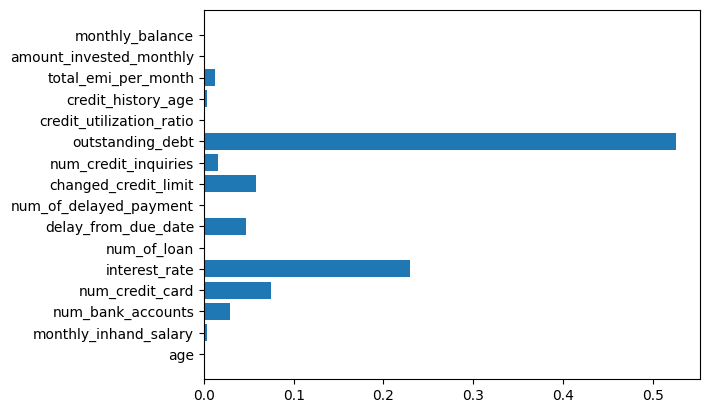

In [57]:
plt.barh(X_train_num.columns,best_clf.feature_importances_, )

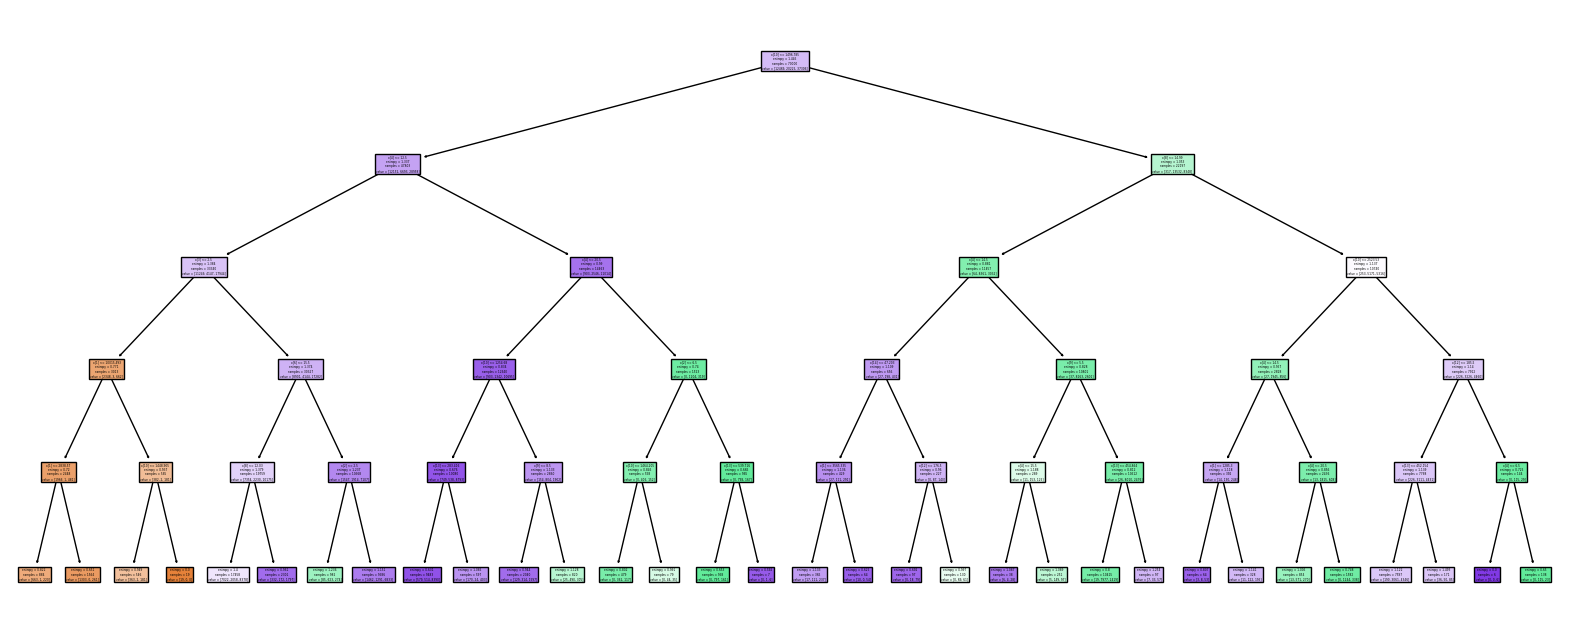

In [58]:
plt.figure(figsize = (20,8))
from sklearn import tree

tree.plot_tree(best_clf,filled=True)
plt.savefig('ResultadosNumericos.pdf', transparent=True, dpi=300)